<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

# 실습 내용

- Boston 데이터를 대상으로 모델링를 진행합니다.
- 개별 알고리즘으로 모델을 만들어 성능을 확인합니다.
- Voting 앙상블을 사용해 모델을 만들어 성능을 확인합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [17]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/boston.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [ ]:
# 상위 몇 개 행 확인
data.head()

In [ ]:
# 하위 몇 개 행 확인
data.tail()

In [ ]:
# 변수 확인
data.info()

# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

In [18]:
# target 확인
target = 'medv'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]

**2) 학습용, 평가용 데이터 분리**

In [19]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) 

**3) 정규화**

In [5]:
# 모듈 불러오기
from sklearn.preprocessing import MinMaxScaler

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_s =  scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

# 4.모델링

- 본격적으로 모델을 선언하고 학습하고 평가하는 과정을 진행합니다.
- 우선 회귀 문제인지 분류 문제인지 명확히 구분합니다.

## 4.1.Linear Regression 모델링

- Linear Regression 알고리즘으로 모델링하고 성능을 확인합니다.

In [20]:
# 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

# 선언하기
model = LinearRegression()

# 학습하기
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

# 성능정보 수집
result = {}
result['Linear Regression'] = r2_score(y_test, y_pred)

3.3446655035987582
0.7836295385076268


## 4.2.KNN 모델링

- KNN 알고리즘으로 모델링하고 성능을 확인합니다.

In [21]:
# 불러오기
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import *

# 선언하기
model = KNeighborsRegressor(n_neighbors=5)

# 학습하기
model.fit(x_train_s, y_train)

# 예측하기
y_pred = model.predict(x_test_s)

# 평가하기
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

# 성능정보 수집
result['KNN'] = r2_score(y_test, y_pred)

3.0625
0.7736645971285965


## 4.3.Decision Tree 모델링

- Decision Tree 알고리즘으로 모델링하고 성능을 확인합니다.

In [22]:
# 불러오기
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import *

# 선언하기
model = DecisionTreeRegressor(max_depth=5)

# 학습하기
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

# 성능정보 수집
result['Decision Tree'] = r2_score(y_test, y_pred)

2.712860613376739
0.8627140711202218


## 4.4.Random Forest 모델링

- Random Forest 알고리즘으로 모델링하고 성능을 확인합니다.

In [23]:
# 불러오기
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import *

# 선언하기
model = RandomForestRegressor()

# 학습하기
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

# 성능정보 수집
result['Random Forest'] = r2_score(y_test, y_pred)

2.242796052631579
0.9059780220590598


## 4.5.LightGBM 모델링

- LightGBM 알고리즘으로 모델링하고 성능을 확인합니다.

In [24]:
# 불러오기
from lightgbm import LGBMRegressor
from sklearn.metrics import *

# 선언하기
model = LGBMRegressor()

# 학습하기
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

# 성능정보 수집
result['LighrGBM'] = r2_score(y_test, y_pred)

2.3867770049274055
0.8951512818806806


## 4.6.Voting

- Voting 앙상블을 사용해 모델링하고 성능을 확인합니다.

In [25]:
# 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import VotingRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import *

# 선언하기
estimators = [('lr', LinearRegression()),
              ('dt', DecisionTreeRegressor()),
              ('knn', make_pipeline(MinMaxScaler(), KNeighborsRegressor())), #x_train 데이터가 minmaxscaler에 알아서 전달되면 정규화하고 knn에 넘겨준다
              ('rdf', RandomForestRegressor()),
              ('lgb', LGBMRegressor())]

model = VotingRegressor(estimators=estimators)

# 학습하기
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

# 성능정보 수집
result['Voting'] = r2_score(y_test, y_pred)

2.2803946362611267
0.8993932723080461


# 5.성능 비교

- 위에서 수집한 성능 정보를 시각화해 비교합니다.

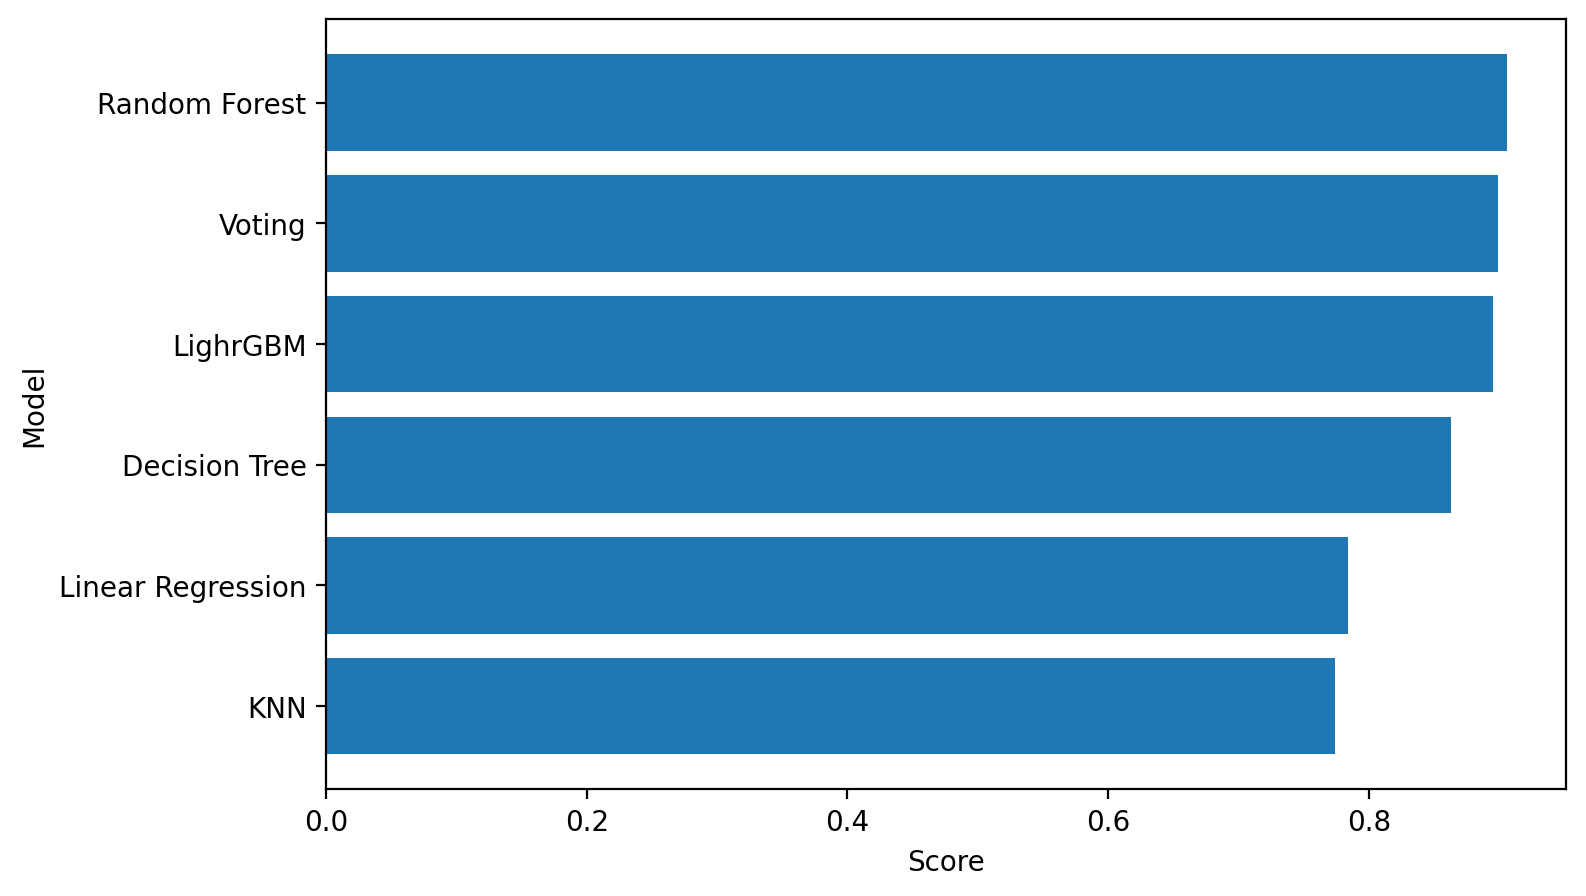

In [26]:
# 데이터프레임 만들기
df = pd.DataFrame.from_dict(result, orient='index', columns=['score'])
df.sort_values(by='score', ascending=True, inplace=True)

# 성능 비교
plt.figure(figsize=(8, 5))
plt.barh(y=df.index, width=df['score'])
plt.xlabel('Score')
plt.ylabel('Model')
plt.show()